First, the preamble

In [1]:
"""
Statistical tests (paired t-test) to show that variability decreases over trials
"""
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import sys
from scipy import stats
from tol_colors import tol_cmap, tol_cset
cmap = tol_cset('bright')
import numpy as np
import matplotlib.pyplot as plt


# # Using seaborn's style
# plt.style.use('seaborn')
# width = 345

tex_fonts = {

    "text.usetex": True,
    "font.family": "serif",

    "axes.labelsize": 12,
    "font.size": 12,

    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

plt.rcParams.update(tex_fonts)

# add current path to system PATH 
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis')

# Import user defined libraries
import DataExtraction.extractRawData as dataExtractor
from BasicAnalytics import targetAcqusitionPlotting as targetPlotter
from BasicAnalytics import variabilityAnalysis 
from BasicAnalytics import plottingFuncs

# Move to correct location
os.chdir('/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis')



In [2]:
# Fetch key training data for variability analysis
rigidBodyTrain, scores, noParticipants = dataExtractor.retrieveTrainingData()



Extracting trial 1 data ...


  0%|          | 0/11 [00:00<?, ?it/s]

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


100%|██████████| 11/11 [00:03<00:00,  2.82it/s]


Extracting trial 2 data ...


100%|██████████| 11/11 [00:03<00:00,  3.13it/s]


Extracting trial 3 data ...


100%|██████████| 11/11 [00:03<00:00,  3.33it/s]


Extracting trial 4 data ...


100%|██████████| 11/11 [00:06<00:00,  1.62it/s]


Extracting trial 5 data ...


100%|██████████| 11/11 [00:03<00:00,  2.79it/s]


In [83]:
# Calculate variability values of training data
rmsValues = variabilityAnalysis.calculateVariabilityScores(rigidBodyTrain,includePositions=False,positionsOnly=False)
print(rmsValues.shape)

# Calculate variability values of individual body parts by summing over dof for each body part
rmsValues = np.sum(rmsValues.reshape(19,3,noParticipants*5),axis = 1).reshape(19,noParticipants*5)
rmsValues[11:13,:] = np.zeros(rmsValues[11:13,:].shape)
# Normalisation and sum variability values across DOF
summedRMSvaluesAcrossDOF = np.sum(rmsValues.reshape(19,5,noParticipants),axis = 0)
summedRMSvaluesAcrossDOF = summedRMSvaluesAcrossDOF / np.max(summedRMSvaluesAcrossDOF)


(57, 55)


In [84]:
summedRMSvaluesAcrossDOF.shape
scores = scores/np.max(scores)

In [85]:
def hex_to_rgb(hex_color):
    """
    Convert a hex color string to an RGB tuple.
    
    Parameters:
    hex_color (str): Hexadecimal color string (e.g., '#6699CC')
    
    Returns:
    tuple: Corresponding (r, g, b) tuple
    """
    # Remove the hash symbol if present
    hex_color = hex_color.lstrip('#')

    # Parse the hex color string into RGB components
    r = int(hex_color[0:2], 16)
    g = int(hex_color[2:4], 16)
    b = int(hex_color[4:6], 16)

    return (r, g, b)

def get_color_hex(value, light_color, dark_color):
    """Function returns hexadecimal color based on value between 0 and 1."""
    # Check value is bounded first
    value = max(0, min(1, value))

    light_color = hex_to_rgb(light_color)
    dark_color = hex_to_rgb(dark_color)

    # Interpolate between light and dark colors
    r = int(light_color[0] + value * (dark_color[0] - light_color[0]))
    g = int(light_color[1] + value * (dark_color[1] - light_color[1]))
    b = int(light_color[2] + value * (dark_color[2] - light_color[2]))

    # Return as hexadecimal
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)
    

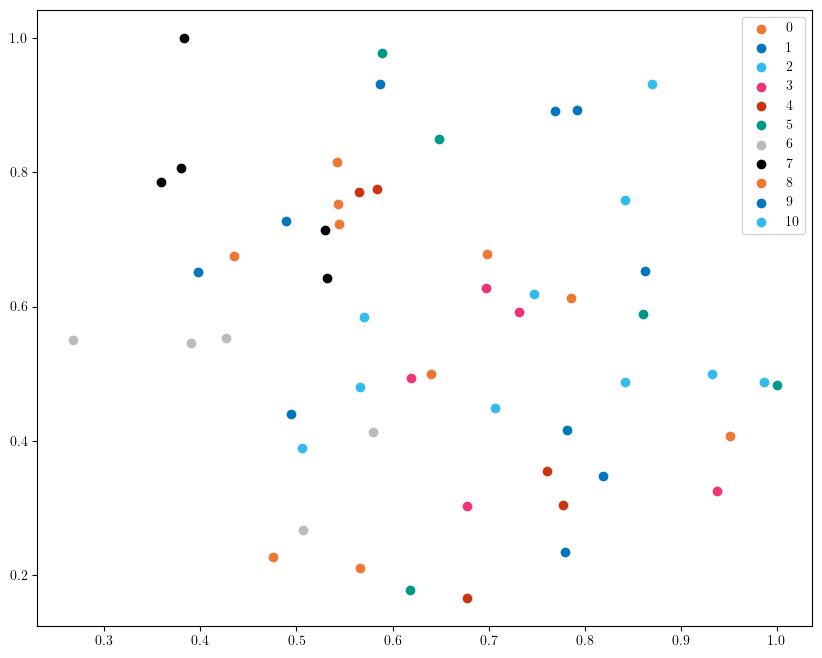

PearsonRResult(statistic=-0.19185553574705594, pvalue=0.1605477325499734)


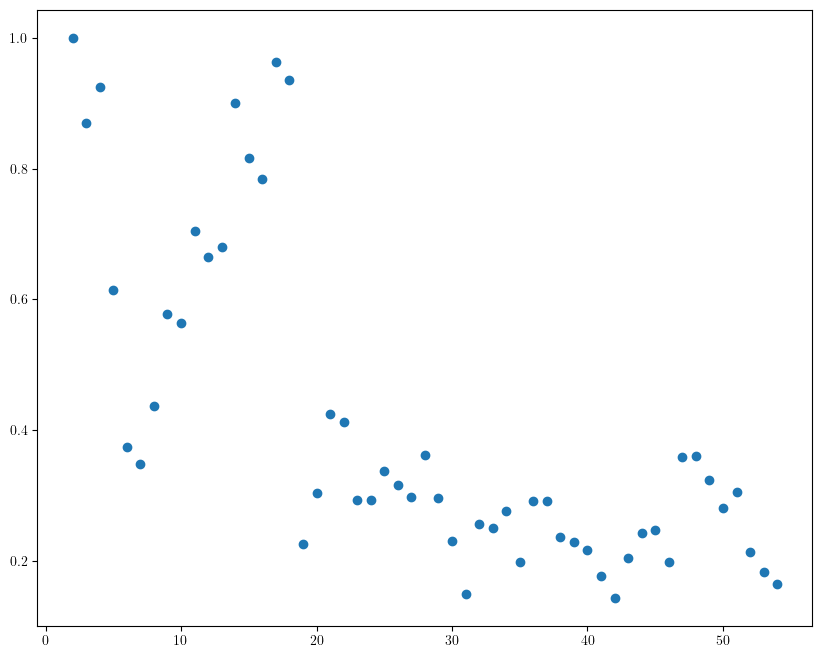

PearsonRResult(statistic=-0.28106755841428216, pvalue=0.03764657076293246)


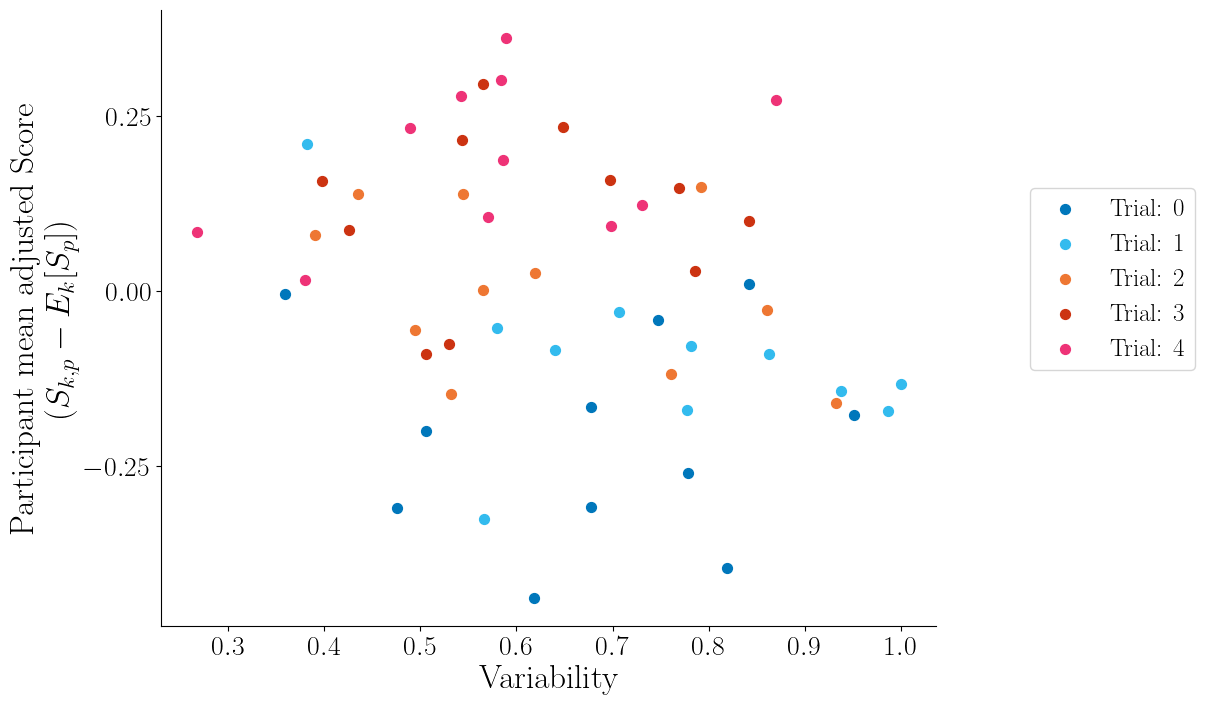

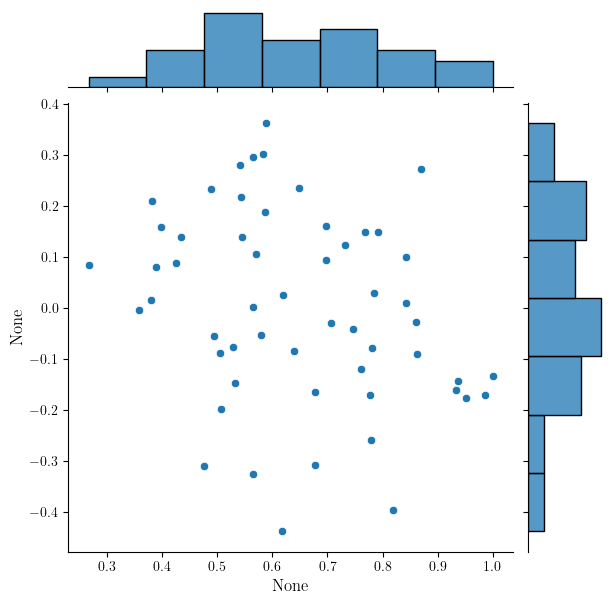

In [86]:
for participantIdx in range(11):
    plt.scatter(summedRMSvaluesAcrossDOF[:,participantIdx],scores[participantIdx,:].T,label = str(participantIdx) , color = cmap[participantIdx%len(cmap)] )
plt.legend()
plt.show()

pvals = []
for i in range(2,55):
    stat, pVal = stats.pearsonr(scores[:,:].T.reshape(-1)[:i],summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:i])
    pvals.append(pVal)
plt.scatter(range(2,55),pvals)
print(stats.pearsonr(scores[:,:].T.reshape(-1)[:],summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:]))
plt.show()
# Can we just normalise each participant for scale and variance
avgScoresByParticipant = np.average(scores[:,:],axis = 1)
scoresAvgAdj = np.zeros(scores.shape)
for i in range(11):
    scoresAvgAdj[i,:] = scores[i,:] - avgScoresByParticipant[i]

cmap = tol_cset('vibrant')
symbols = ['.','P','3','d','*']
colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for trialIdx in range(5):
    plt.scatter(summedRMSvaluesAcrossDOF[trialIdx,:],scoresAvgAdj[:,trialIdx].T,label ="Trial: " + str(trialIdx), s = 50,color = colors[trialIdx] )
plt.legend()
plt.title("")
print(stats.pearsonr(scoresAvgAdj[:,:].T.reshape(-1)[:],summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:]))
plottingFuncs.defaultPlottingConfiguration(plt.gca(),maxXTicks = 4, maxYTicks=4, xlabel = "Variability", ylabel = "Participant mean adjusted Score \n ($S_{k,p} -E_k[S_{p}] $)")
plt.legend(loc = 'upper right', fontsize = 18,bbox_to_anchor=(1.35, 0.73))
plt.show()

import seaborn as sns

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.jointplot(x=summedRMSvaluesAcrossDOF[:,:].reshape(-1),y=scoresAvgAdj[:,:].T.reshape(-1));


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/1394010514.py:64: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1b-VariabilityAgainstPerformance.pdf")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/1394010514.py:64: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1b-VariabilityAgainstPerformance.pdf")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/1394010514.py:64: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1b-VariabilityAgainstPerformance.pdf")


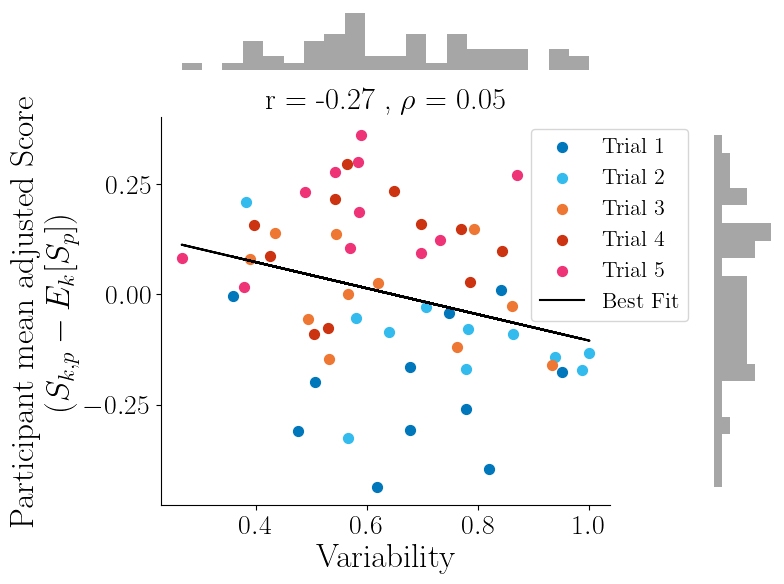

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sample data
np.random.seed(0)

# Create a figure with a gridspec
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(3, 4, fig,height_ratios=[0.15,0.7,0.15],width_ratios=[0.2,0.3,0.3,0.2])

# Scatter plot
ax_main = fig.add_subplot(gs[1:3, 0:3])


cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for trialIdx in range(5):
    ax_main.scatter(summedRMSvaluesAcrossDOF[trialIdx,:],scoresAvgAdj[:,trialIdx].T,label ="Trial " + str(trialIdx+1), s = 50,color = colors[trialIdx] )


# Fit a regression line
x = summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:]
y = scoresAvgAdj[:,:].T.reshape(-1)[:]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Calculate confidence interval
ci = 1.96 * std_err * np.sqrt(1/len(x) + (x - np.mean(x))**2 / np.sum((x - np.mean(x))**2))

# Create the plot


ax_main.plot(x, line, 'k', label='Best Fit')

ax_main.legend()

R,p = stats.spearmanr(scoresAvgAdj[:,:].T.reshape(-1)[:],summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:])

plottingFuncs.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=4, xlabel = "Variability", ylabel = "Participant mean adjusted Score \n ($S_{k,p} -E_k[S_{p}] $)")
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.2, 1))

if p < 0.05:
    plt.title(r"r = {} , $\rho$  $=$ {} ".format(round(R,2),round(p,2)), fontsize = 22)


# Histogram for x-axis
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_xhist.hist(summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:], bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')

# Histogram for y-axis
ax_yhist = fig.add_subplot(gs[1:3, 3], sharey=ax_main)
ax_yhist.hist(scoresAvgAdj[:,:].T.reshape(-1)[:], bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')





# Adjust layout
plt.tight_layout()
plt.savefig("1.1b-VariabilityAgainstPerformance.pdf")
plt.show()

In [88]:
scores.shape

trials = np.asarray([[0]*11, [1]*11,[2]*11,[3]*11,[4]*11]).reshape(5,11)
trials

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test: r = {}, p $<$ 
Test: r = 0.6600542792685633, p $<$ 4.207878429824026e-08
Test: r = -0.25511300364367784, p $<$ 


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/2396109267.py:75: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1b-VariabilityAgainstPerformance.pdf")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/2396109267.py:75: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1b-VariabilityAgainstPerformance.pdf")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/2396109267.py:75: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1b-VariabilityAgainstPerformance.pdf")


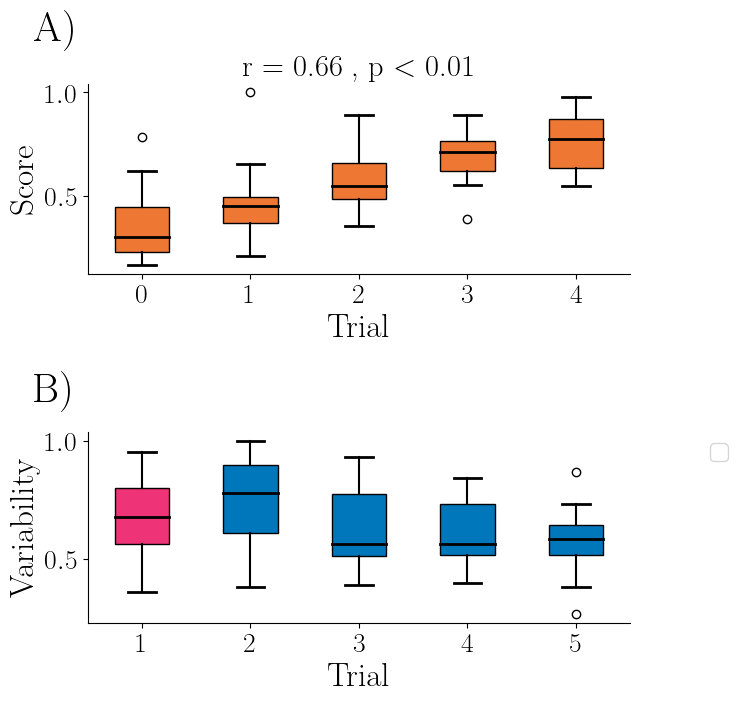

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sample data
np.random.seed(0)

# Create a figure with a gridspec
fig = plt.figure(figsize=(7, 7))
gs = GridSpec(3,1,fig,width_ratios = [1], height_ratios=[0.4,0.2,0.4])


# Get axis
ax3 = fig.add_subplot(gs[0, 0])

# Plot scores
# ax.plot(np.average(scores[:,:],axis =0),label = "Score",color = cmap[1])
# scoreError = np.std(scores, axis=0)
# ax.errorbar([0,1,2,3,4], np.average(scores[:,:],axis =0), yerr=scoreError, ecolor=cmap[1], capsize=3,color = cmap[1], linestyle = "dotted")

# Get second axis
ax4 = fig.add_subplot(gs[2, 0])

# Plot variabilities
plottingFuncs.createBoxPlot(ax3,
                            [scores[:,0],scores[:,1],scores[:,2],scores[:,3],scores[:,4]],
                            colorList= [cmap[0]] * 5, 
                            xTickList=[0,1,2,3,4],
                            xlabel = "Trial",
                            ylabel= "Variability")

plottingFuncs.createBoxPlot(ax4,
                            [summedRMSvaluesAcrossDOF[0,:],summedRMSvaluesAcrossDOF[1,:],summedRMSvaluesAcrossDOF[2,:],summedRMSvaluesAcrossDOF[3,:],summedRMSvaluesAcrossDOF[4,:]],
                            colorList= [cmap[3], cmap[1],cmap[1] , cmap[1], cmap[1]],
                            xlabel = "Trial",
                            ylabel= "Variability")




# Correlation between trials and scores
R,p = stats.pearsonr(trials[:,:].reshape(-1), summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:])
print("Test: r = {}, p $<$ ")
# Default plotting configurations
plottingFuncs.defaultPlottingConfiguration(ax3,maxXTicks = 4, maxYTicks=2, xlabel = "Trial", ylabel = "Score ",removeSpine = True)
plottingFuncs.defaultPlottingConfiguration(ax4,maxXTicks = 4, maxYTicks=2, xlabel = "Trial", ylabel = "Variability ",removeSpine = True)



# Plot legend
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.2, 1))

# Correlation between trials and scores
R,p = stats.spearmanr(trials[:,:].reshape(-1), scores[:,:].T.reshape(-1)[:])
print("Test: r = {}, p $<$ {}".format(R,p))

# Add p value if statistically significant
if p < 0.05:
    ax3.set_title("r = {} , p $<$ {} ".format(round(R,2),0.01), fontsize = 22)

# Correlation between trials and variabilities
R,p = stats.spearmanr(trials[:,:].reshape(-1), summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:])
print("Test: r = {}, p $<$ ".format(R,p))

# Add p value if statistically significant
if p < 0.05:
    ax4.set_title("r = {} , p $<$ {} ".format(round(R,2),0.05), fontsize = 22)

ax4.text(0.2, 1.3, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")

ax3.text(0.2, 1.4, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")


# Adjust layout
plt.savefig("1.1b-VariabilityAgainstPerformance.pdf")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test: r = {}, p $<$ 
Test: r = 0.6600542792685633, $\rho$ $=$ 4.207878429824026e-08
Test: r = -0.27786407026361926, $\rho$  $=$ 0.03997524437878743


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/1786820223.py:130: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-compositeVariability.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/1786820223.py:130: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-compositeVariability.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/1786820223.py:130: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-compositeVariability.pdf",bbox_inches='tight')


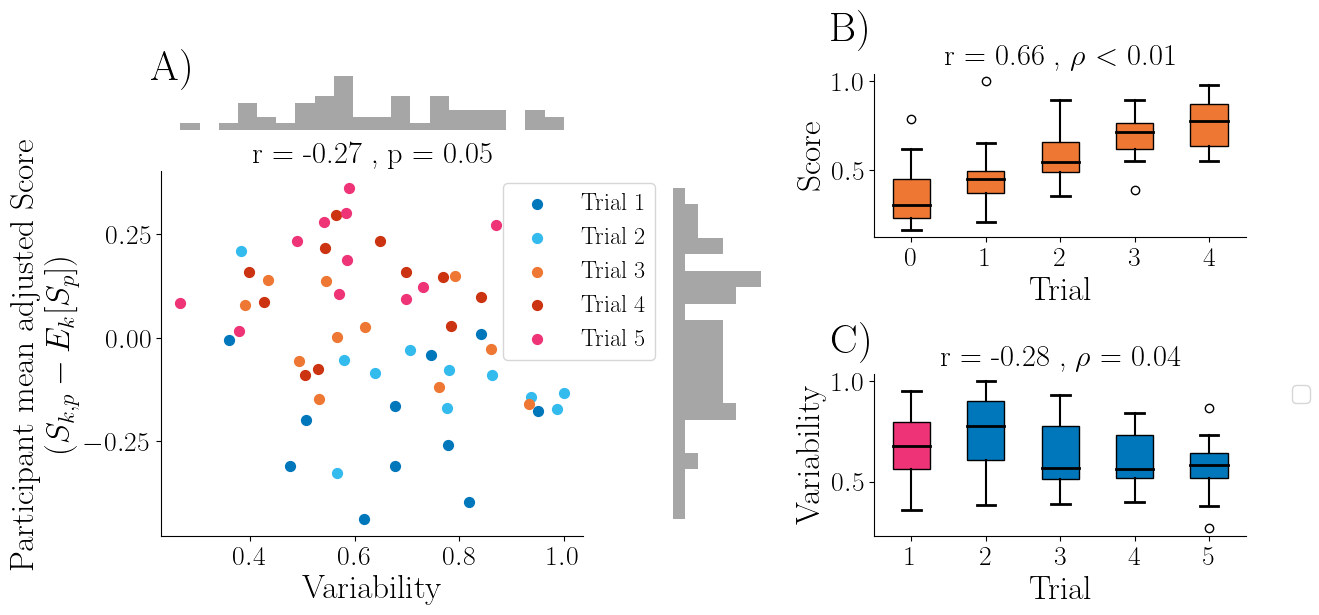

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sample data
np.random.seed(0)

# Create a figure with a gridspec
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(7, 6, fig,height_ratios=[0.15,0.05,0.175,0.1,0.175,0.25,0.15],width_ratios=[0.06,0.36,0.03,0.10,0.05,0.4])

# Scatter plot
ax_main = fig.add_subplot(gs[2:7, 0:2])


cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for trialIdx in range(5):
    ax_main.scatter(summedRMSvaluesAcrossDOF[trialIdx,:],scoresAvgAdj[:,trialIdx].T,label ="Trial " + str(trialIdx+1), s = 50,color = colors[trialIdx] )


# Fit a regression line
x = summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:]
y = scoresAvgAdj[:,:].T.reshape(-1)[:]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Calculate confidence interval
ci = 1.96 * std_err * np.sqrt(1/len(x) + (x - np.mean(x))**2 / np.sum((x - np.mean(x))**2))

# Create the plot


#ax_main.plot(x, line, 'k', label='Fit')

ax_main.legend()

R,p = stats.spearmanr(scoresAvgAdj[:,:].T.reshape(-1)[:],summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:])

plottingFuncs.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=4, xlabel = "Variability", ylabel = "Participant mean adjusted Score \n ($S_{k,p} -E_k[S_{p}] $)")
plt.legend(loc = 'upper right', fontsize = 17.5,bbox_to_anchor=(1.2, 1))

if p < 0.05:
    ax_main.set_title("r = {} , p $=$ {} ".format(round(R,2),round(p,2)), fontsize = 22)


# Histogram for x-axis
ax_xhist = fig.add_subplot(gs[0, 0:2], sharex=ax_main)
ax_xhist.hist(summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:], bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')

# Histogram for y-axis
ax_yhist = fig.add_subplot(gs[2:7, 3], sharey=ax_main)
ax_yhist.hist(scoresAvgAdj[:,:].T.reshape(-1)[:], bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec



# Get axis
ax3 = fig.add_subplot(gs[0:3, 5])


# Get second axis
ax4 = fig.add_subplot(gs[5:7, 5])

# Plot variabilities
plottingFuncs.createBoxPlot(ax3,
                            [scores[:,0],scores[:,1],scores[:,2],scores[:,3],scores[:,4]],
                            colorList= [cmap[0]] * 5, 
                            xTickList=[0,1,2,3,4],
                            xlabel = "Trial",
                            ylabel= "Variability")

plottingFuncs.createBoxPlot(ax4,
                            [summedRMSvaluesAcrossDOF[0,:],summedRMSvaluesAcrossDOF[1,:],summedRMSvaluesAcrossDOF[2,:],summedRMSvaluesAcrossDOF[3,:],summedRMSvaluesAcrossDOF[4,:]],
                            colorList= [cmap[3], cmap[1],cmap[1] , cmap[1], cmap[1]],
                            xlabel = "Trial",
                            ylabel= "Variability")




# Correlation between trials and scores
R,p = stats.spearmanr(trials[:,:].reshape(-1), summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:])
print("Test: r = {}, p $<$ ")
# Default plotting configurations
plottingFuncs.defaultPlottingConfiguration(ax3,maxXTicks = 4, maxYTicks=2, xlabel = "Trial", ylabel = "Score ",removeSpine = True)
plottingFuncs.defaultPlottingConfiguration(ax4,maxXTicks = 4, maxYTicks=2, xlabel = "Trial", ylabel = "Variability ",removeSpine = True)



# Plot legend
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.2, 1))

# Correlation between trials and scores
R,p = stats.spearmanr(trials[:,:].reshape(-1), scores[:,:].T.reshape(-1)[:])
print(r"Test: r = {}, $\rho$ $=$ {}".format(R,p))

# Add p value if statistically significant
if p < 0.05:
    ax3.set_title(r"r = {} , $\rho$ $<$ {} ".format(round(R,2),0.01), fontsize = 22)

# Correlation between trials and variabilities
R,p = stats.pearsonr(trials[:,:].reshape(-1), summedRMSvaluesAcrossDOF[:,:].reshape(-1)[:])
print(r"Test: r = {}, $\rho$  $=$ {}".format(R,p))

# Add p value if statistically significant

ax4.set_title(r"r = {} , $\rho$ $=$ {} ".format(round(R,2),round(p,2)), fontsize = 22)

ax4.text(0.2, 1.3, 'C)', ha='center', va='top', fontsize=30, fontweight = "bold")

ax3.text(0.2, 1.4, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")


ax_main.text(0.25, 0.7, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")

# Adjust layout



# Adjust layout
#plt.tight_layout()
plt.gcf().set_size_inches(14,6) 
plt.savefig("1.1-compositeVariability.pdf",bbox_inches='tight')
plt.show()

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/592909396.py:72: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1b-VariabilityAgainstPerformance.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/592909396.py:72: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1b-VariabilityAgainstPerformance.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/592909396.py:72: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1b-VariabilityAgainstPerformance.pdf",bbox_inches='tight')


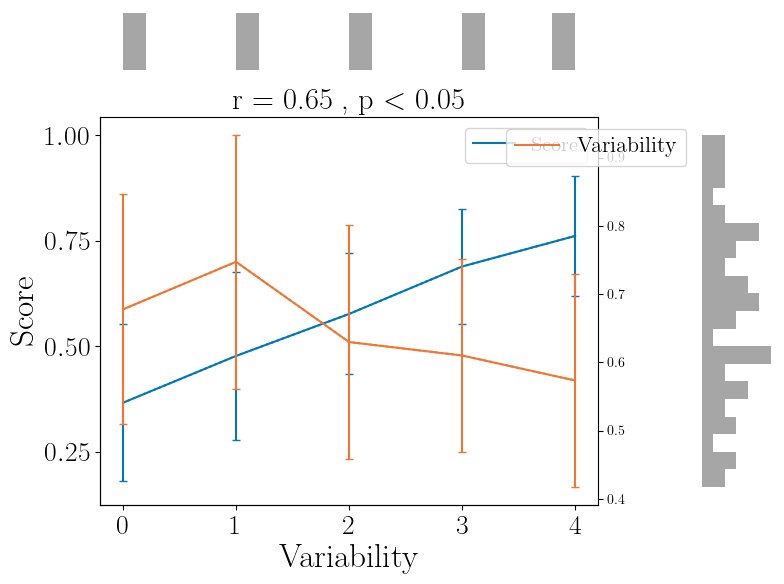

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sample data
np.random.seed(0)

# Create a figure with a gridspec
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(3, 4, fig,height_ratios=[0.15,0.7,0.15],width_ratios=[0.2,0.3,0.3,0.2])

# Scatter plot
ax_main = fig.add_subplot(gs[1:3, 0:3])

trials = np.asarray( [0]*11 + [1]*11 + [2]*11 + [3] * 11 + [4] * 11 ).reshape(5,11)

cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
# for trialIdx in range(5):
#     ax_main.scatter(trials[trialIdx,:],scores[:,trialIdx].T,label ="Trial " + str(trialIdx+1), s = 50,color = colors[trialIdx] )

# plottingFuncs.createBoxPlot(ax_main,[scores[:,0,],scores[:,1,],scores[:,2,],scores[:,3,],scores[:,4,]],colorList = [cmap[0],cmap[1],cmap[2],cmap[3],cmap[4]],
# xTickList=[1,2,3,4,5], xlabel="Trial",ylabel = "Score")

# ax_other = ax_main.twinx()
# plottingFuncs.createErrorBarPlot(scores,xLabel = "Trial",yLabel = "Score", xTicks = [0,1,2,3,4],
# xTickLabels = [1,2,3,4,5],ax = ax_main, barColor = colors)

# plottingFuncs.createBoxPlot(ax_main,[summedRMSvaluesAcrossDOF[0,:],summedRMSvaluesAcrossDOF[1,:],summedRMSvaluesAcrossDOF[2,:],summedRMSvaluesAcrossDOF[3,:],summedRMSvaluesAcrossDOF[4,:]],colorList = [cmap[0],cmap[1],cmap[2],cmap[3],cmap[4]],
# xTickList=[1,2,3,4,5], xlabel="Trial",ylabel = "Score")
# Fit a regression line

ax_main.plot(np.average(scores[:,:],axis =0),label = "Score",color = cmap[1])
scoreError = np.std(scores, axis=0)
ax_main.errorbar([0,1,2,3,4], np.average(scores[:,:],axis =0), yerr=scoreError, ecolor=cmap[1], capsize=3,color = cmap[1], linestyle = "dotted")
# plt.plot(np.average(rmsValuesAveragedOverParticipants[:,8,:],axis = 1).T,label = "Average",color = cmap[3])

twinAxis = ax_main.twinx()

twinAxis.plot(np.average(summedRMSvaluesAcrossDOF[:,:],axis =1),label = "Variability",color = cmap[0])
variabilityError = np.std(summedRMSvaluesAcrossDOF, axis=1)
twinAxis.errorbar([0,1,2,3,4], np.average(summedRMSvaluesAcrossDOF[:,:],axis =1), yerr=variabilityError, ecolor=cmap[0], capsize=3,color = cmap[0], linestyle = "dotted")

# plottingFuncs.createErrorBarPlot(summedRMSvaluesAcrossDOF.T,xLabel = "Trial",yLabel = "Variability", xTicks = [0,1,2,3,4],
# xTickLabels = [1,2,3,4,5],ax = ax_main, barColor = colors)


ax_main.legend()

R,p = stats.pearsonr(trials[:,:].reshape(-1), scores[:,:].T.reshape(-1)[:])

plottingFuncs.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=4, xlabel = "Variability", ylabel = "Score ")
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.2, 1))

if p < 0.05:
    plt.title("r = {} , p $<$ {} ".format(round(R,2),0.05), fontsize = 22)


# Histogram for x-axis
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_xhist.hist(trials[:,:].reshape(-1)[:], bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')

# Histogram for y-axis
ax_yhist = fig.add_subplot(gs[1:3, 3], sharey=ax_main)
ax_yhist.hist(scores[:,:].T.reshape(-1)[:], bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')

# Adjust layout
plt.tight_layout()
plt.savefig("1.1b-VariabilityAgainstPerformance.pdf",bbox_inches='tight')
plt.show()

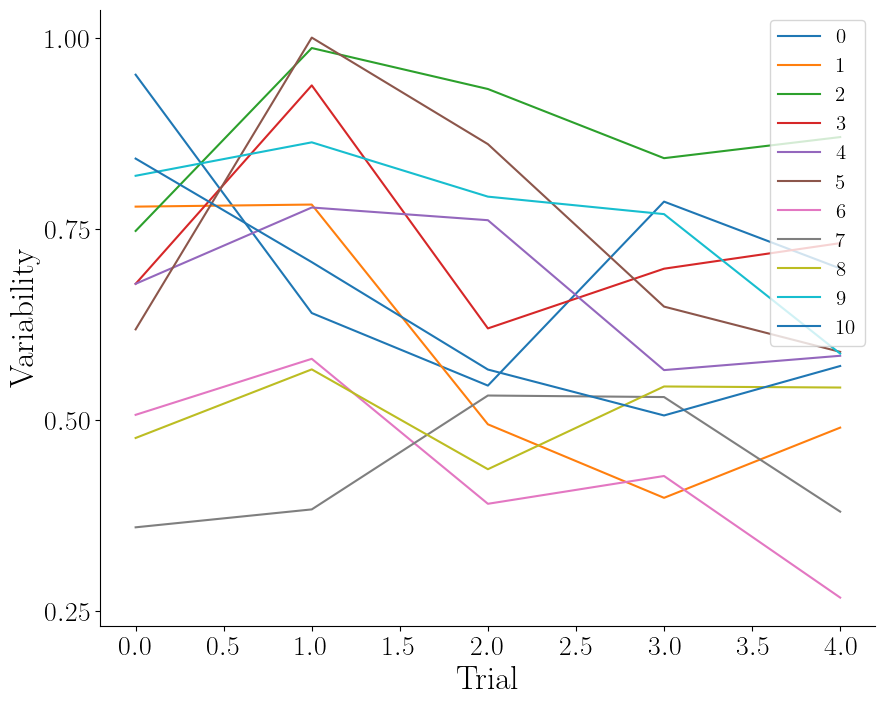

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/1751244159.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("StatisticalTest.pdf")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/1751244159.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("StatisticalTest.pdf")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12741/1751244159.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

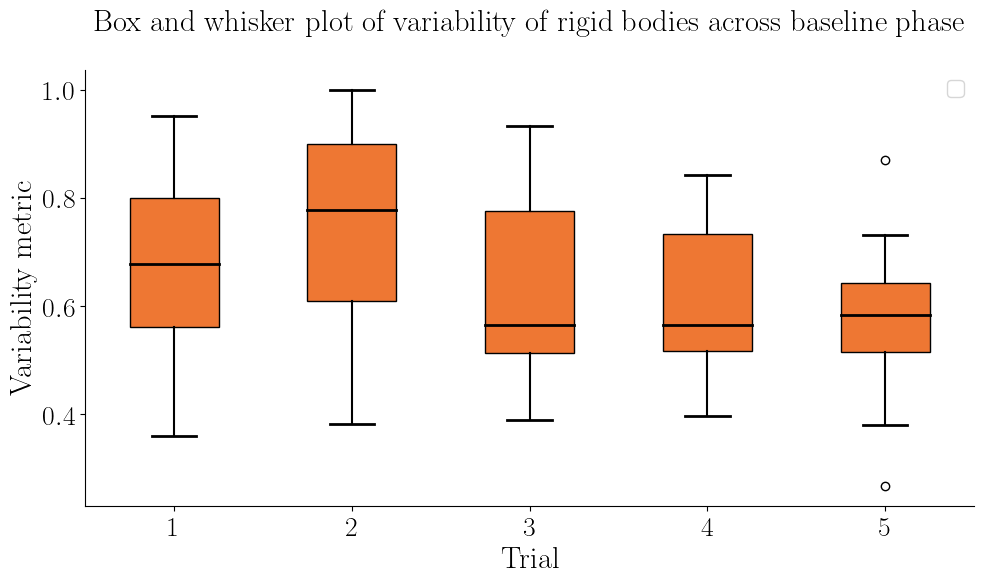

In [92]:

plt.plot(summedRMSvaluesAcrossDOF,label = [str(i) for i in range(11) ])
plt.legend()
plottingFuncs.defaultPlottingConfiguration(plt.gca(),maxYTicks=4,ylabel = "Variability",xlabel = "Trial")
plt.show()

# Plot a box plot

# Define colours
red = (245/255,5/255,5/255) # (RGB) or F50505 (Hex)
colors = [cmap[0]]* 5

# Define other parameters for function
xTickList = ['1','2', '3', '4', '5']
variabilities = [summedRMSvaluesAcrossDOF[0,:],summedRMSvaluesAcrossDOF[1,:],summedRMSvaluesAcrossDOF[2,:],summedRMSvaluesAcrossDOF[3,:],summedRMSvaluesAcrossDOF[4,:]]

# Define figure properties
fig = plt.figure(figsize=(10,6))
ax = plt.gca()

# Create box plot
plottingFuncs.createBoxPlot(ax, variabilities, colors, xTickList, 'Trial', 'Variability metric')

# Create message for p value

# Make title
plt.title("Box and whisker plot of variability of rigid bodies across baseline phase \n", fontsize = 22)

# Plot legend 
plt.legend(fontsize = 15)

# Ensure everything is visible
fig.tight_layout() 
plt.savefig("StatisticalTest.pdf")
plt.show()